In [ ]:
import numpy as np
import matplotlib.pyplot as plt

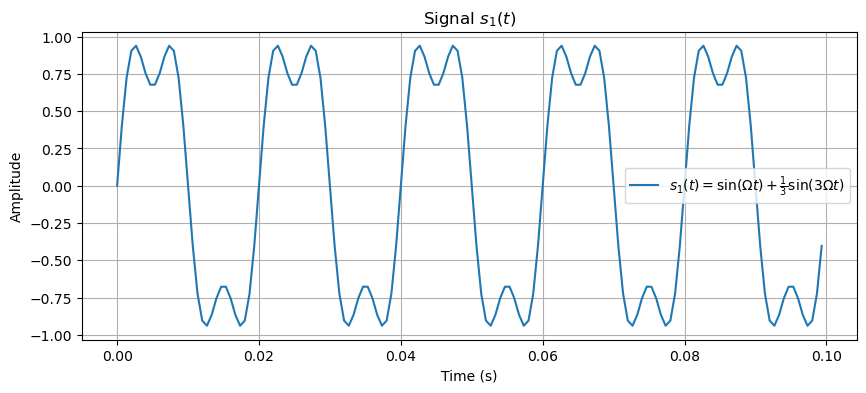

In [22]:
#1.1
F1 = 50  # Fundamental frequency 
Fs = 1500  # Sampling frequency 

# Angular frequency
Omega = 2 * np.pi * F1

# Time vector 
T1 = 0.1  
t = np.arange(0, T1, 1 / Fs) 

# Signal
s1 = np.sin(Omega * t) + (1 / 3) * np.sin(3 * Omega * t)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, s1, label=r'$s_1(t) = \sin(\Omega t) + \frac{1}{3} \sin(3\Omega t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal $s_1(t)$')
plt.legend()
plt.grid(True)
plt.show()

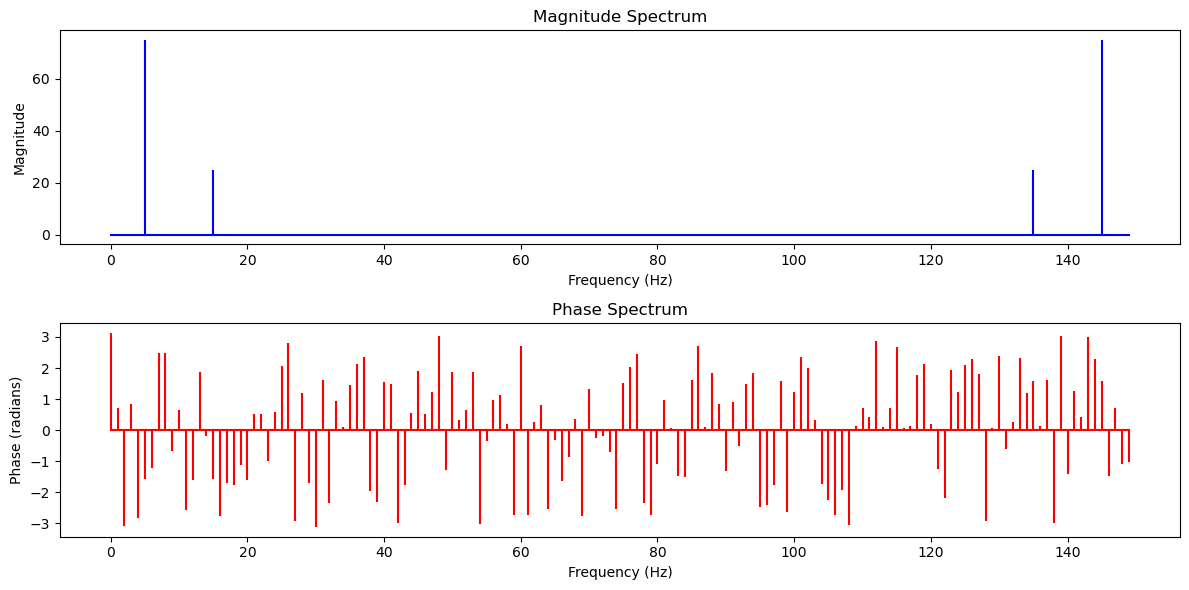

In [24]:
#1.2
N = len(s1)
X = np.zeros(N, dtype=complex)

# DFT
for k in range(N):
    for n in range(N):
        X[k] += s1[n] * np.exp(-1j * 2 * np.pi * k * n / N)

# Magnitude and phase spectra
magnitude_spectrum = np.abs(X)
phase_spectrum = np.angle(X)

plt.figure(figsize=(12, 6))

# Magnitude spectrum
plt.subplot(2, 1, 1)
plt.stem(np.arange(N), magnitude_spectrum, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Phase spectrum
plt.subplot(2, 1, 2)
plt.stem(np.arange(N), phase_spectrum, 'r', markerfmt=" ", basefmt="-r")
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()

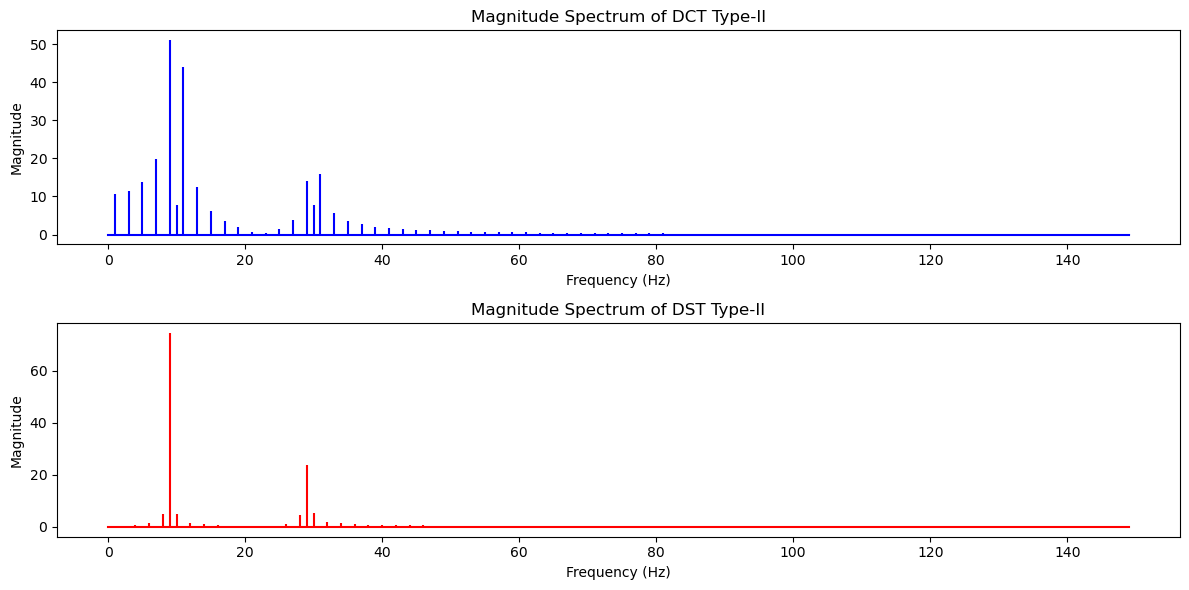

In [33]:
#1.3
N = len(s1)
X_dct = np.zeros(N)
Y_dst = np.zeros(N)

# DCT Type-II
for k in range(N):
    for n in range(N):
        X_dct[k] += s1[n] * np.cos(np.pi * (n + 0.5) * k / N)

# DST Type-II
for k in range(N):
    for n in range(N):
        Y_dst[k] += s1[n] * np.sin(np.pi * (n + 0.5) * (k + 1) / N)

# Magnitude spectra
magnitude_spectrum_dct = np.abs(X_dct)
magnitude_spectrum_dst = np.abs(Y_dst)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(np.arange(N), magnitude_spectrum_dct, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum of DCT Type-II')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.stem(np.arange(N), magnitude_spectrum_dst, 'r', markerfmt=" ", basefmt="-r")
plt.title('Magnitude Spectrum of DST Type-II')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

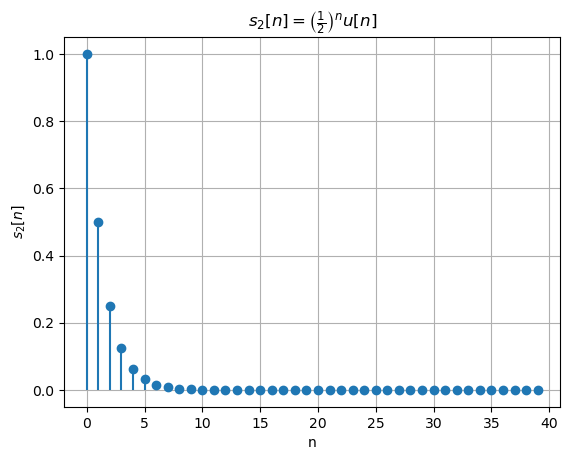

In [34]:
#1.4
# Range
n = np.arange(0, 40)  

# Unit step function 
u = np.heaviside(n, 1)

# Signal 
s2 = (0.5 ** n) * u

# Plot
plt.stem(n, s2, basefmt=" ")
plt.title(r'$s_2[n] = \left(\frac{1}{2}\right)^n u[n]$')
plt.xlabel('n')
plt.ylabel('$s_2[n]$')
plt.grid(True)
plt.show()


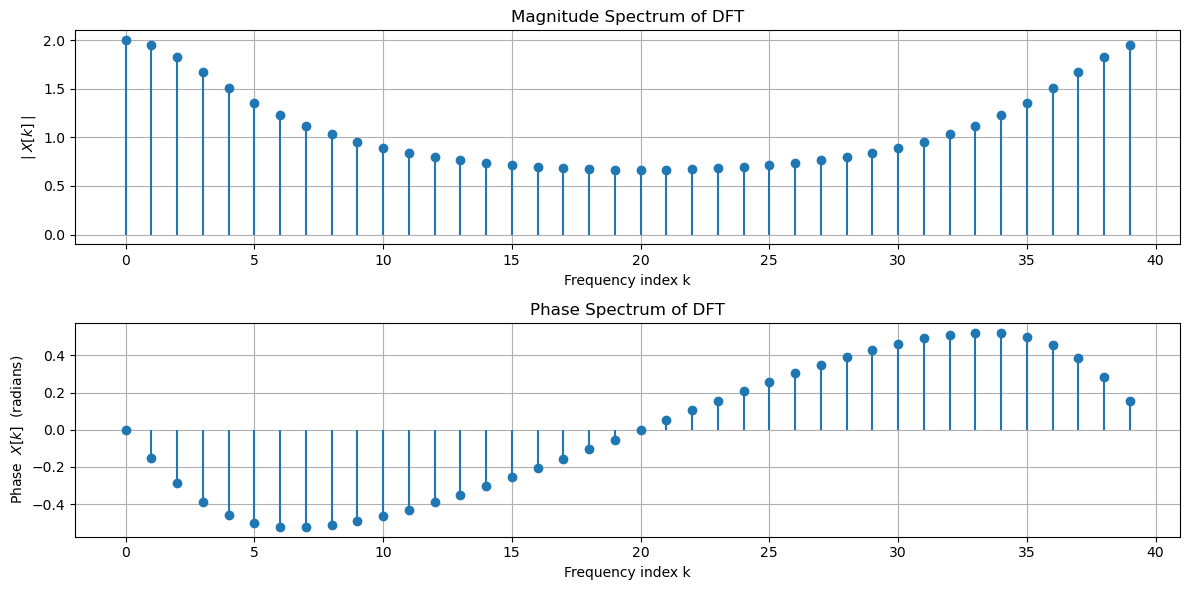

In [44]:
#1.5.1

N = len(s2)  

# DFT 
X = np.zeros(N, dtype=complex)
for k in range(N):
    for m in range(N):
        X[k] += s2[m] * np.exp(-1j * 2 * np.pi * k * m / N)


magnitude_spectrum = np.abs(X)

phase_spectrum = np.angle(X)

# Plot 
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(n, magnitude_spectrum, basefmt=" ")
plt.title('Magnitude Spectrum of DFT')
plt.xlabel('Frequency index k')
plt.ylabel('$| \; X[k] \; |$')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.stem(n, phase_spectrum, basefmt=" ")
plt.title('Phase Spectrum of DFT')
plt.xlabel('Frequency index k')
plt.ylabel('Phase $\; X[k]\; $ (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()


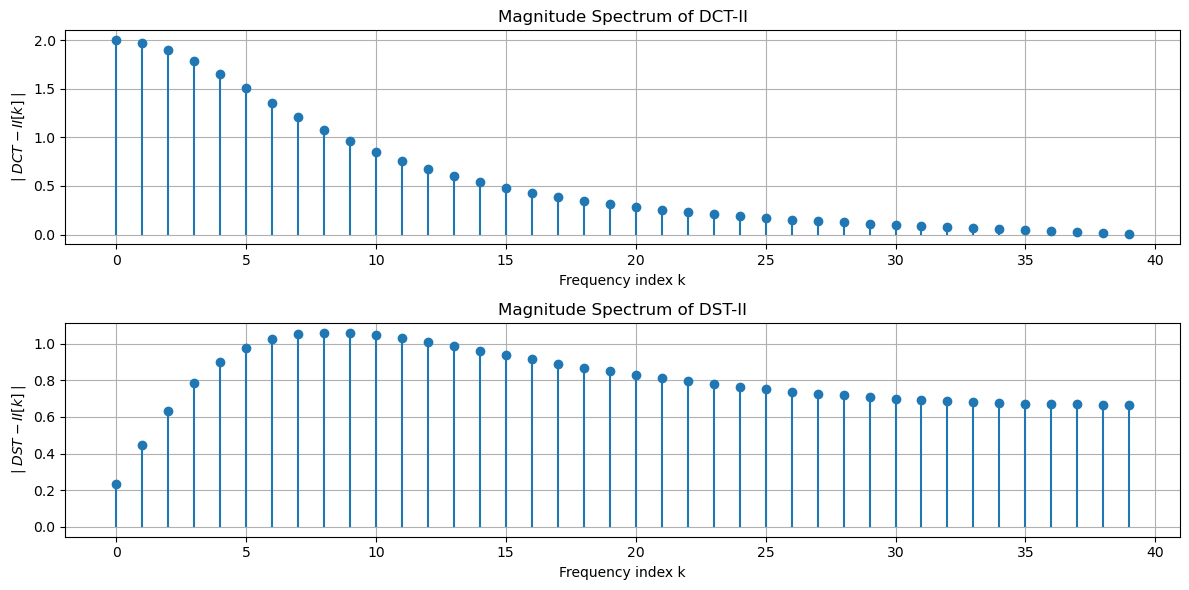

In [45]:
#1.5.2

# DCT-II 
def dct_ii(x):
    N = len(x)
    X = np.zeros(N)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.cos(np.pi / N * (n + 0.5) * k)
    return X

# DST-II 
def dst_ii(x):
    N = len(x)
    Y = np.zeros(N)
    for k in range(N):
        for n in range(N):
            Y[k] += x[n] * np.sin(np.pi / N * (n + 0.5) * (k + 1))
    return Y


dct_s2 = dct_ii(s2)
dst_s2 = dst_ii(s2)

# magnitude spectrum 
magnitude_dct = np.abs(dct_s2)
magnitude_dst = np.abs(dst_s2)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(n, magnitude_dct, basefmt=" ")
plt.title('Magnitude Spectrum of DCT-II')
plt.xlabel('Frequency index k')
plt.ylabel('$|\; DCT-II[k]\;|$')
plt.grid(True)

# Plot 
plt.subplot(2, 1, 2)
plt.stem(n, magnitude_dst, basefmt=" ")
plt.title('Magnitude Spectrum of DST-II')
plt.xlabel('Frequency index k')
plt.ylabel('$|\;DST-II[k]\;|$')
plt.grid(True)

plt.tight_layout()
plt.show()


MSE for DFT reconstruction: 0.0038158124926433836
MSE for DCT reconstruction: 12.03227772936754
MSE for DST reconstruction: 11.329959343412206


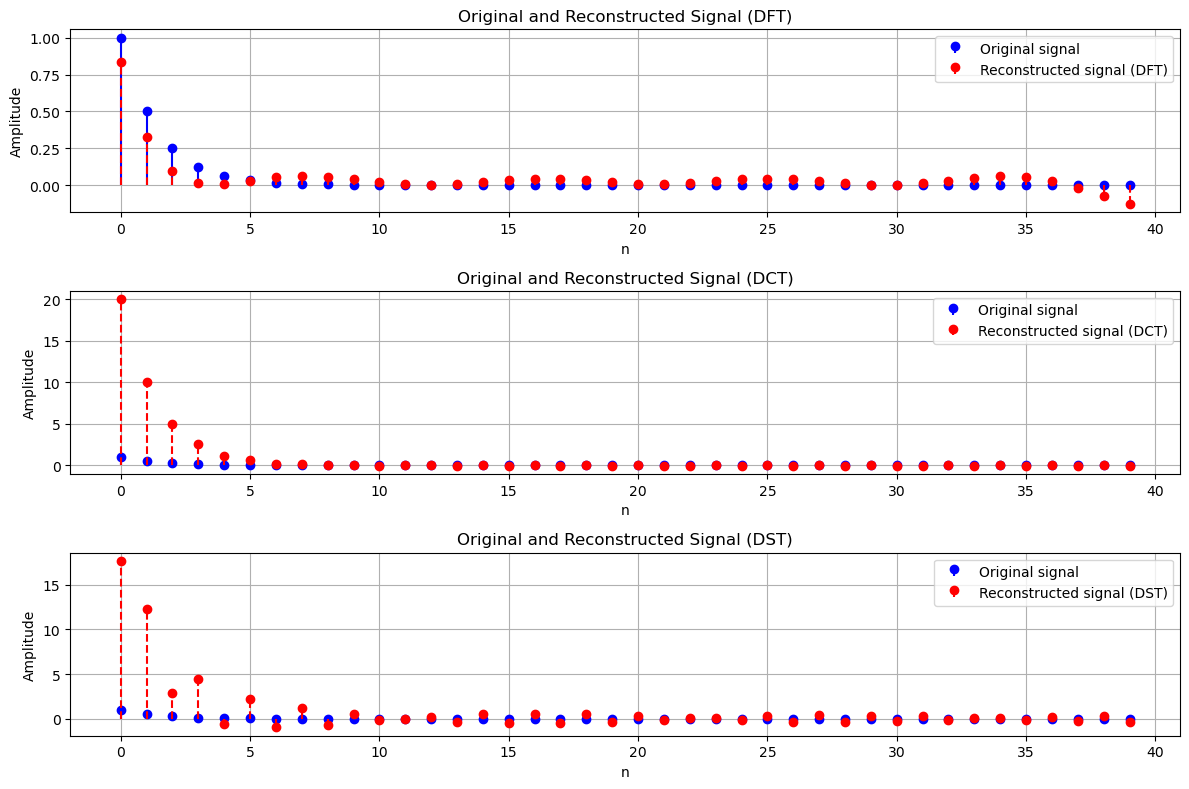

In [53]:
#1.6

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for m in range(N):
            X[k] += x[m] * np.exp(-1j * 2 * np.pi * k * m / N)
    return X

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
    return x / N


def idct_ii(X):
    N = len(X)
    x = np.zeros(N)
    for n in range(N):
        x[n] = 0.5 * X[0]
        for k in range(1, N):
            x[n] += X[k] * np.cos(np.pi / N * (n + 0.5) * k)
    return x

def idst_ii(Y):
    N = len(Y)
    x = np.zeros(N)
    for n in range(N):
        for k in range(N):
            x[n] += Y[k] * np.sin(np.pi / N * (n + 0.5) * (k + 1))
    return x

# Function 
def retain_coefficients(coefficients, percentage):
    N = len(coefficients)
    retained = np.zeros(N, dtype=coefficients.dtype)
    threshold = int(np.ceil(percentage * N))
    retained[:threshold] = coefficients[:threshold]
    return retained


dft_s2 = dft(s2)
dct_s2 = dct_ii(s2)
dst_s2 = dst_ii(s2)

# Retained % of the coefficients
percentage = 0.90
# percentage = 0.75
# percentage = 0.45

dft_s2_retained = retain_coefficients(dft_s2, percentage)
dct_s2_retained = retain_coefficients(dct_s2, percentage)
dst_s2_retained = retain_coefficients(dst_s2, percentage)

# Reconstruction
s2_dft_reconstructed = idft(dft_s2_retained).real
s2_dct_reconstructed = idct_ii(dct_s2_retained)
s2_dst_reconstructed = idst_ii(dst_s2_retained)


mse_dft = np.mean((s2 - s2_dft_reconstructed) ** 2)
mse_dct = np.mean((s2 - s2_dct_reconstructed) ** 2)
mse_dst = np.mean((s2 - s2_dst_reconstructed) ** 2)

# MSE values
print(f"MSE for DFT reconstruction: {mse_dft}")
print(f"MSE for DCT reconstruction: {mse_dct}")
print(f"MSE for DST reconstruction: {mse_dst}")


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, s2, linefmt='b-', markerfmt='bo', basefmt=' ', label='Original signal')
plt.stem(n, s2_dft_reconstructed, linefmt='r--', markerfmt='ro', basefmt=' ', label='Reconstructed signal (DFT)')
plt.title('Original and Reconstructed Signal (DFT)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, s2, linefmt='b-', markerfmt='bo', basefmt=' ', label='Original signal')
plt.stem(n, s2_dct_reconstructed, linefmt='r--', markerfmt='ro', basefmt=' ', label='Reconstructed signal (DCT)')
plt.title('Original and Reconstructed Signal (DCT)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, s2, linefmt='b-', markerfmt='bo', basefmt=' ', label='Original signal')
plt.stem(n, s2_dst_reconstructed, linefmt='r--', markerfmt='ro', basefmt=' ', label='Reconstructed signal (DST)')
plt.title('Original and Reconstructed Signal (DST)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
